# Decision Trees and Random Forest

## Learning Objectives

1. Understand how a decision tree is built and how it works
2. Learn how to build a decision tree with scikit-learn
3. Understand how decision trees overfit
4. Understand how random forests work, and how they overcome the decision tree overfitting problem
5. Learn how to build a random forest model with scikit-learn

# Decision Trees

## Introduction

* Decision tree is a type of supervised learning algorithm
* It works for both categorical and continuous (regression) input and output variables
* In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.
* Consider following illustration about a decision tree trying to decide the type of an animal.

![](https://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.08-decision-tree.png)

## Why Decision Trees?

* Easy to Understand and Interpret
* Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed.
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree
* Able to handle both numerical and categorical data
* Able to handle multi-class problems
* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret
* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated

## How Decision Trees are made

### Splitting the nodes:

We'll be focussing on Binary Decision Trees.

A split in the dataset involves one input attribute and one value for that attribute. Describe the following:
1. age, 50
2. gender, male


* Decision trees use a criteria (there are multiple criteria available) to decide to split a node in two or more sub-nodes
* The creation of sub-nodes increases the homogeneity of resultant sub-nodes
    - What is homogeneity here? Distribution of the classes in the target variable
* In other words, we can say that purity of the node increases with respect to the target variable
* Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

Let's look at some of the metrics we use for splitting.

#### Gini Index/Gini Impurity:

* A Gini score gives an idea of how good a split is by how mixed the classes are in the two groups created by the split.
* It measures how often a randomly chosen element would be incorrectly identified.
* A perfect separation results in a Gini score of 0, whereas the worst case split that results in 50/50 classes in each group results in a Gini score of 1.0 (for a 2 class problem).

##### Example

* We have two groups of data with 2 rows in each node.
* The rows in the first node all belong to class 0 and the rows in the second node belong to class 1, so it’s a perfect split.

We first need to calculate the proportion of classes in each node.

> proportion = count(class_value) / count(rows)

Thus

> node_1_class_0 = 2 / 2 = 1

> node_1_class_1 = 0 / 2 = 0

> node_2_class_0 = 0 / 2 = 0

> node_2_class_1 = 2 / 2 = 1

Then, the value of Gini Index would be

> gini_index = sum(proportion * (1.0 - proportion))

> (across all of the proportions calculated for each node and each class value)

```
gini_index = (group_1_class_0 * (1.0 - group_1_class_0)) +
		(group_1_class_1 * (1.0 - group_1_class_1)) +
		(group_2_class_0 * (1.0 - group_2_class_0)) +
		(group_2_class_1 * (1.0 - group_2_class_1))
           = 0 + 0 + 0 + 0
           = 0
```

**Note**: Sometimes people get the calculation of Gini Index wrong. [Here is an example (explain what is wrong with it)](http://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php)

![](./images/dtree01.png)

#### Information Gain

Information gain measurs degree of disorganization in a system (known as Entropy). If the sample is completely homogeneous, then the entropy is zero and if the sample is an equally divided (50% – 50%), it has entropy of one.

![](./images/dtree02.png)
    

#### Reduction in Variance

* Reduction in variance is an algorithm used for continuous target variables (regression problems)
* This algorithm uses the standard formula of variance to choose the best split
* The split with lower variance is selected as the criteria to split the population

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/01/Varince-300x88.png)


### How is the splitting done?


* Given a dataset, we 
    - check every value on each attribute as a candidate split
    - evaluate the cost of the split
    - find the best possible split we could make and make the split (create a node)
    - once a node is created, we can create child nodes recursively on each group of data from the split by following the same procedure
    - we keep doing this till some stopping criteria is met (or we are left with just 1 data point)
        * no of points left (for the current node)
        * depth
        * Gini is already 0!
* [Constructing Optimal Binary Trees is NP-Complete](https://people.csail.mit.edu/rivest/HyafilRivest-ConstructingOptimalBinaryDecisionTreesIsNPComplete.pdf), [link 2](http://www2.ic.uff.br/~loana/decisiontree.pdf), [link 3](http://www.contrib.andrew.cmu.edu/~ravi/adaptive-icalp10.pdf)
    - NP-C = NP $\cap$ NP-hard
        * NP - the set of all decision problems whose solutions can be verified in polynomial time
        * NP-hard - a problem H is NP-hard when every problem L in NP can be reduced in polynomial time to H, that is: assuming a solution for H takes 1 unit time, we can use H's solution to solve L in polynomial time
    - Although any given solution to an NP-complete problem can be verified quickly (in polynomial time), there is no known efficient way to locate a solution in the first place
    - The most notable characteristic of NP-complete problems is that no fast solution to them is known
        * That is, the time required to solve the problem using any currently known algorithm increases very quickly as the size of the problem grows
    - As a consequence, determining whether it is possible to solve these problems quickly, called the P versus NP problem, is one of the principal unsolved problems in computer science today


## Understanding Decision Tree Terminology:

Let’s look at the basic terminology used with Decision trees:

* **Root Node:** It represents entire population or sample and this further gets divided into two or more homogeneous sets.
* **Splitting:** It is a process of dividing a node into two or more sub-nodes.
* **Decision Node:** When a sub-node splits into further sub-nodes, then it is called decision node.
* **Leaf / Terminal Node:** Nodes do not split is called Leaf or Terminal node.
* **Pruning:** When we remove sub-nodes of a decision node, this process is called pruning.
* **Branch / Sub-Tree:** A sub section of entire tree is called branch or sub-tree.
* **Parent and Child Node:** A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

# Hands-on

## A Quick Example

In [30]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn import tree
import numpy as np

sizevar = 120
iris = load_iris()
clf = tree.DecisionTreeClassifier(random_state=300)
clf = clf.fit(iris.data[:sizevar,:], iris.target[:sizevar])

In [25]:
clf.predict(iris.data[:400, :])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
clf.predict_proba(iris.data[:100, :])

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.

In [39]:
rep = classification_report(iris.target[sizevar:], 
                      clf.predict(iris.data[sizevar:, :]),
                      target_names=iris.target_names)
print(rep)

             precision    recall  f1-score   support

     setosa       0.00      0.00      0.00         0
 versicolor       1.00      0.80      0.89        30

avg / total       1.00      0.80      0.89        30



In [41]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='|S10')

## Example: Effect of Increasing max_depth

### Depth 2 and 5, size 80

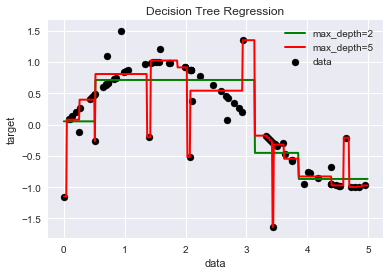

In [42]:
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Depth 2 and 5, size 800

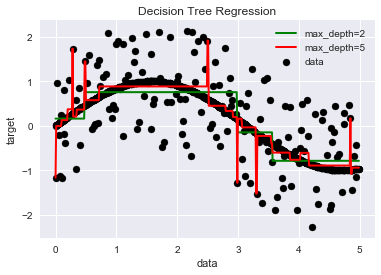

In [43]:
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(800, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(160))

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Depth 2 and 3, size 800

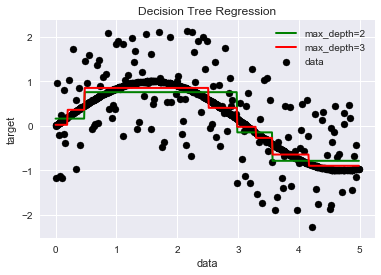

In [44]:
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(800, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(160))

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=3)
regr_1.fit(X, y)
regr_2.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=3", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Training a model with cross-validation

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.86666667,  0.93333333,  1.        ,  1.        ,  1.        ])

In [14]:
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [19]:
clf.feature_importances_ 

array([ 0.        ,  0.01333333,  0.06405596,  0.92261071])

### Example: With a synthetic dataset

Consider the following two-dimensional data, which has four class labels:

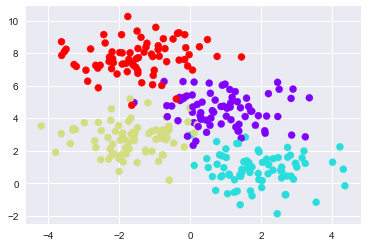

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [4]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

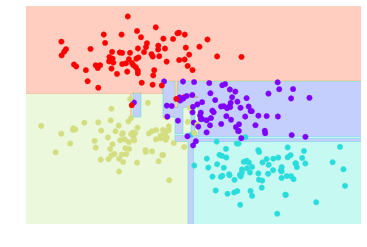

In [5]:
visualize_classifier(DecisionTreeClassifier(), X, y)

## Challenges with Decision Trees:

* **Over fitting:** Over fitting is one of the most practical difficulty for decision tree models
* **Instability:** Slight change in input data set completely changes the ultimate tree structure
* **Not fit for continuous variables:** While working with continuous numerical variables, decision tree looses information when it categorizes variables in different categories


We will explore the problems of overfitting and instability in greater detail.

## Decision trees and over-fitting

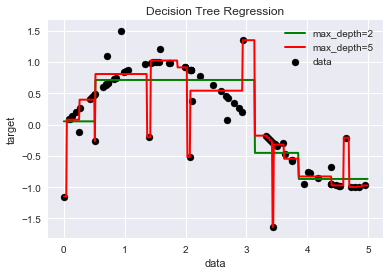

In [18]:
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Hyper-parameter Tuning

* Decision trees tend to overfit on data with a large number of features
    - Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.
    - Consider performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand to give your tree a better chance of finding features that are discriminative
* Visualise your tree as you are training by using the export function
    - Use max_depth=3 as an initial tree depth to get a feel for how the tree is fitting to your data, and then increase the depth
* Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to
    - Use max_depth to control the size of the tree to prevent overfitting
* Use min_samples_split or min_samples_leaf to control the number of samples at a leaf node
    - A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data
    - Try min_samples_leaf=5 as an initial value
    - The main difference between the two is that min_samples_leaf guarantees a minimum number of samples in a leaf, while min_samples_split can create arbitrary small leaves, though min_samples_split is more common in the literature
    

## Dealing with Overfitting:

Overfitting can be prevented in 2 ways:

1. Setting constraints on tree size
2. Tree pruning

## Setting Constraints on Tree Size

This can be done by using various parameters which are used to define a tree.

* **Maximum depth of tree (vertical depth)** 

    * Depth of the tree is the most important factor influen
    * Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
    * Should be tuned using CV.


* **Minimum samples for a node split:** 
    * Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.

    * Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.

    * Too high values can lead to under-fitting hence, it should be tuned using CV.


* **Minimum samples for a terminal node (leaf)**

    * Defines the minimum samples (or observations) required in a terminal node or leaf.
    
    * Used to control over-fitting similar to min_samples_split.
    
    * Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.


* **Maximum number of terminal nodes**

    * The maximum number of terminal nodes or leaves in a tree.
    * Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of $2^n$ leaves.


* **Maximum features to consider for split**
    * The number of features to consider while searching for a best split. These will be randomly selected.
    * As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
    * Higher values can lead to over-fitting but depends on case to case.
 

## Tree Pruning

As discussed earlier, the technique of setting constraint is a greedy-approach. 

In other words, it will check for the best split instantaneously and move forward until one of the specified stopping condition is reached.

* We first make the decision tree to a large depth.
* Then we start at the bottom and start removing leaves which are giving us negative returns when compared from the top.


Suppose a split is giving us a gain of say -10 (loss of 10) and then the next split on that gives us a gain of 20. A simple decision tree will stop at step 1 but in pruning, we will see that the overall gain is +10 and keep both leaves.


Note that sklearn’s decision tree classifier does not currently support pruning.

## Cons

* Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting
    - Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems
* Decision tree learners create biased trees if some classes dominate
    - It is therefore recommended to balance the dataset prior to fitting with the decision tree

# TASK 1

Predict for a model built using cross-validation (used above).

# TASK 2

* Obtain the Titanic dataset from Kaggle - https://www.kaggle.com/c/titanic
* Clean the dataset with this script: https://gist.github.com/jay-trivedi/4ab63ebf09313094e8e97376d6f254ad
* Fit and tune a decision tree model
* Submit to Kaggle

# Task 3

Prepare for the quiz we'll have tomorrow. Here are the questions I'm going to ask:

1. Describe the following variants - ID3, C4.5, C5.0, CHAID, CART. What metrics do they use for splitting? How do they handle classification vs regression?
2. Since calculating the optimal binary decision tree is NP-Complete, we have to use heuristic methods. Describe one example (find a paper). What does scikit-learn use?
3. How does Decision tree do on large datasets?

# Task 4

Explain and plot the following dataset

In [45]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Task 5

Explain

* Bagging
* Subspace Sampling
